In [ ]:
import sys, pathlib
import pandas as pd
from sklearn.metrics import roc_auc_score

# 1) Fix up sys.path so "algo" imports work
project_root = pathlib.Path().resolve()
while not (project_root / "algo").exists():
    project_root = project_root.parent
sys.path.insert(0, str(project_root))

from algo.model import _prepare_xy, _build_pipe

# 2) build correct path into your data_processed folder under algo/
feat_csv = project_root / "algo" / "data_processed" / "HDFCBANK_3minute_feat.csv"
print("Loading from:", feat_csv)
df = pd.read_csv(feat_csv, index_col=0, parse_dates=True).dropna()

# 3) Prepare X, y
X, y = _prepare_xy(df)
print(f"Total windows: {len(X)}, positives: {y.sum()}, negatives: {len(y)-y.sum()}")

# 4) split & train
n_train    = int(len(X) * 0.8)
X_train    = X[:n_train];   X_val    = X[n_train:]
y_train    = y[:n_train];   y_val    = y[n_train:]

pipe       = _build_pipe().fit(X_train, y_train)
y_proba    = pipe.predict_proba(X_val)[:,1]
auc        = roc_auc_score(y_val, y_proba)

print(f"🧪 Baseline Validation ROC-AUC = {auc:.4f}")


Loading from: /Users/sreejit/PycharmProjects/zerodha-bot/algo/data_processed/HDFCBANK_3minute_feat.csv
Total windows: 41944, positives: 20552, negatives: 21392
      Iter       Train Loss   Remaining Time 
         1           1.3853           25.68m
         2           1.3846           25.69m
         3           1.3840           25.69m
         4           1.3834           25.61m
         5           1.3828           25.79m
         6           1.3822           25.84m
         7           1.3816           25.73m
         8           1.3812           25.69m
         9           1.3805           25.57m
        10           1.3801           25.55m
        20           1.3757           25.20m
        30           1.3717           24.27m
        40           1.3683           23.52m
        50           1.3648           22.71m


In [1]:
import sys, pathlib
import pandas as pd
from sklearn.metrics import roc_auc_score

# 1) Fix up sys.path so "algo" imports work
project_root = pathlib.Path().resolve()
while not (project_root / "algo").exists():
    project_root = project_root.parent
sys.path.insert(0, str(project_root))

import pandas as pd
from algo import model          # ← now picks up the new file

df = pd.read_csv(
    "algo/data_processed/HDFCBANK_3minute_feat.csv",
    index_col=0,
    parse_dates=True
)

# fast: finishes in a few seconds with early-stopping
pipe = model.load_or_train(df, retrain=True)

# view AUC printed during training


FileNotFoundError: [Errno 2] No such file or directory: 'algo/data_processed/HDFCBANK_3minute_feat.csv'

In [1]:
import sys, pathlib, pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np

# ── 1) make sure we can import `algo` ───────────────────────────────────
root = pathlib.Path().resolve()
while not (root / "algo").exists():
    root = root.parent
sys.path.insert(0, str(root))

print("Project root:", root)

# ── 2) import freshly edited model.py (force reload) ───────────────────
from importlib import reload
import algo.model as mdl
reload(mdl)                     # ensure updated version is used

# ── 3) load feature-augmented data ─────────────────────────────────────
feat_csv = root / "algo" / "data_processed" / "HDFCBANK_3minute_feat.csv"
df       = pd.read_csv(feat_csv, index_col=0, parse_dates=True).dropna()

# ── 4) train (or reload) ───────────────────────────────────────────────
pipe = mdl.load_or_train(df, retrain=True)        # ~ a few seconds

# ── 5) explicit ROC-AUC on last 20 % slice (optional) ──────────────────
X, y   = mdl._prepare_xy(df)
X, y = mdl._prepare_xy(df)

print("X shape:", X.shape)
print("Any NaN?  ", np.isnan(X).any())
print("Any Inf?  ", np.isinf(X).any())
print("Rows with NaN:", np.where(np.isnan(X).any(axis=1))[0])
print("Rows with Inf:", np.where(np.isinf(X).any(axis=1))[0])

# Optionally: Remove problematic rows
mask = np.isfinite(X).all(axis=1)
print("Rows kept after mask:", mask.sum(), "Rows removed:", (~mask).sum())
X = X[mask]
y = y[mask]

split  = int(len(X)*0.8)
y_hat  = pipe.predict_proba(X[split:])[:,1]
auc = roc_auc_score(y[split:], y_hat)
print("Validation ROC-AUC:", round(auc, 4))


Project root: /Users/sreejit/PycharmProjects/zerodha-bot
🔧  Training started …
✅  Finished in 7.5s   (best_iter = 22, best_AUC = 0.5328)
Hold-out accuracy: 0.532


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


X shape: (41884, 1560)
Any NaN?   False
Any Inf?   False
Rows with NaN: []
Rows with Inf: []
Rows kept after mask: 41884 Rows removed: 0
Validation ROC-AUC: 0.5328


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [1]:
# After fitting your model:
import matplotlib.pyplot as plt

feature_names = []
for lag in range(model.LOOKBACK):
    for f in model.FEATURES:
        feature_names.append(f"{f}_t-{model.LOOKBACK-lag-1}")

importances = pipe.named_steps['lgb'].feature_importances_

# Get top N important features (across all lags)
sorted_idx = importances.argsort()[::-1][:40]
plt.figure(figsize=(10,8))
plt.barh([feature_names[i] for i in sorted_idx][::-1], importances[sorted_idx][::-1])
plt.title("LightGBM Feature Importances (top 40)")
plt.show()


NameError: name 'model' is not defined

Loaded data: (42037, 31)


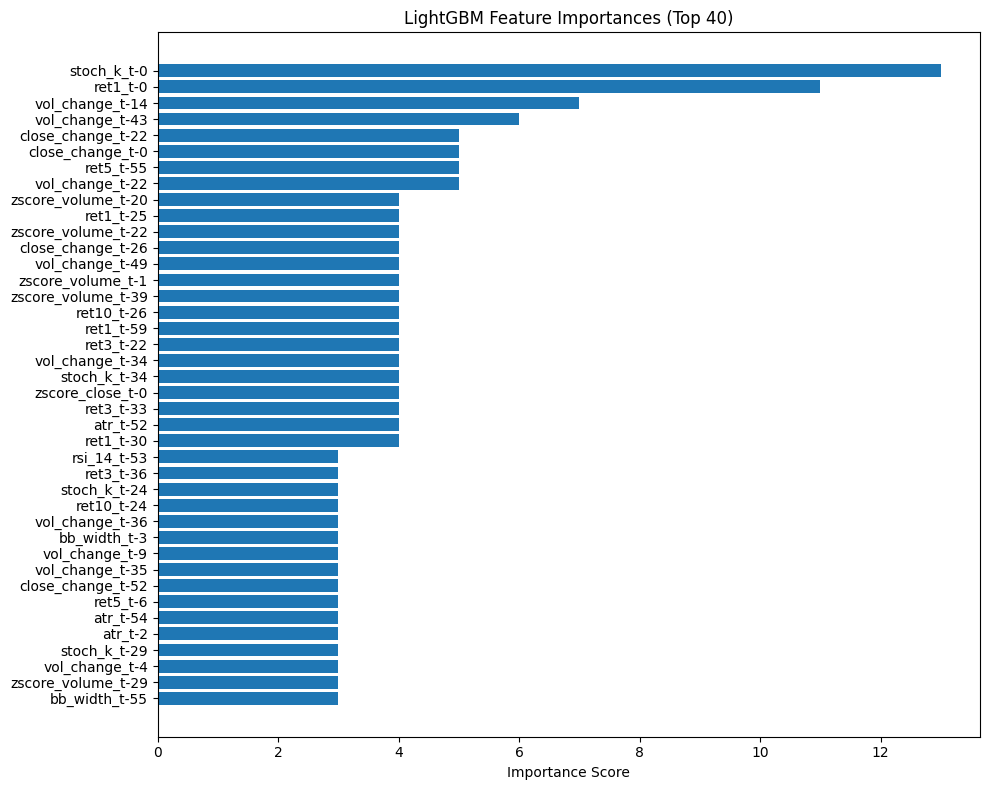

In [1]:
import sys, pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Ensure we can import your model module ---
project_root = pathlib.Path().resolve()
while not (project_root / "algo").exists():
    project_root = project_root.parent
sys.path.insert(0, str(project_root))

from algo import model  # Import your custom model module

# --- 2. Load your processed data ---
feat_csv = project_root / "algo" / "data_processed" / "HDFCBANK_3minute_feat.csv"
df = pd.read_csv(feat_csv, index_col=0, parse_dates=True).dropna()
print(f"Loaded data: {df.shape}")

# --- 3. Train or load the pipeline ---
pipe = model.load_or_train(df, retrain=False)   # Set retrain=True to force fresh fit

# --- 4. Build full list of sliding window feature names (for feature importances) ---
feature_names = [
    f"{feat}_t-{model.LOOKBACK-lag-1}"
    for lag in range(model.LOOKBACK)
    for feat in model.FEATURES
]

# --- 5. Get feature importances from trained LightGBM classifier ---
importances = pipe.named_steps['lgb'].feature_importances_

# --- 6. Plot the top 40 features by importance ---
N = 40
top_idx = np.argsort(importances)[::-1][:N]

plt.figure(figsize=(10, 8))
plt.barh([feature_names[i] for i in top_idx][::-1], importances[top_idx][::-1])
plt.title("LightGBM Feature Importances (Top 40)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [2]:
import collections

# Remove lag to get base feature names (e.g., "stoch_k_t-0" → "stoch_k")
base_feats = [f.split('_t-')[0] for f in feature_names]
imp_scores = importances

# Sum importance per base feature
base_feat_importance = collections.defaultdict(float)
for f, s in zip(base_feats, imp_scores):
    base_feat_importance[f] += s

# Sort by importance and take the top N
N_BASE = 8
top_base_feats = sorted(base_feat_importance, key=base_feat_importance.get, reverse=True)[:N_BASE]
print("Top base features:", top_base_feats)


Top base features: ['vol_change', 'zscore_volume', 'ret1', 'close_change', 'ret3', 'stoch_k', 'ret5', 'zscore_close']


In [1]:
# --- Step 1: Override FEATURES in your loaded model module ---
import sys, pathlib
import pandas as pd

# Find project root (adjust as needed)
project_root = pathlib.Path().resolve()
while not (project_root / "algo").exists():
    project_root = project_root.parent
sys.path.insert(0, str(project_root))

import algo.model as model

# Override with your top base features
model.FEATURES = [
    # paste top 16 or top 20 features here from your importance list, e.g.
    'vol_change', 'zscore_volume', 'ret1', 'close_change', 'ret3', 'stoch_k',
    'ret5', 'zscore_close', 'atr', 'bb_width', 'rsi_14', 'macd',
    'williams_r', 'obv', 'adx', 'supertrend'
]

# --- Step 2: Load data and retrain ---
feat_csv = project_root / "algo" / "data_processed" / "HDFCBANK_3minute_feat.csv"
df = pd.read_csv(feat_csv, index_col=0, parse_dates=True).dropna()

pipe = model.load_or_train(df, retrain=True)  # retrain model

# --- Step 3: Evaluate ROC-AUC on last 20% of data ---
from sklearn.metrics import roc_auc_score

X, y = model._prepare_xy(df)
split = int(len(X) * 0.8)
y_hat = pipe.predict_proba(X[split:])[:, 1]
auc = roc_auc_score(y[split:], y_hat)
print(f"Validation ROC-AUC: {auc:.4f}")


🔧  Training started …
✅  Finished in 3.9s   (best_iter = 6, best_AUC = 0.5321)
Hold-out accuracy: 0.531


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation ROC-AUC: 0.5321


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import sys, pathlib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier

# --- Set up project root & import model ---
project_root = pathlib.Path().resolve()
while not (project_root / "algo").exists():
    project_root = project_root.parent
sys.path.insert(0, str(project_root))
from algo import model

# --- Load your data ---
feat_csv = project_root / "algo" / "data_processed" / "HDFCBANK_3minute_feat.csv"
df = pd.read_csv(feat_csv, index_col=0, parse_dates=True).dropna()

# --- Prepare X, y ---
X, y = model._prepare_xy(df)

# --- Split into train/validation for grid search (time-ordered split) ---
n = int(len(X) * 0.8)
X_train, X_val = X[:n], X[n:]
y_train, y_val = y[:n], y[n:]

# --- Set up parameter grid and grid search ---
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 600]
}

lgb = LGBMClassifier(subsample=0.8, colsample_bytree=0.8, random_state=0)
gs = GridSearchCV(lgb, param_grid, scoring='roc_auc', n_jobs=-1, cv=3, verbose=1)

# --- Run grid search ---
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best ROC-AUC (CV):", gs.best_score_)
